In [52]:
#EDA Packages
import pandas as pd
import numpy as np

In [53]:
# Plotting Packages
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# ML Packages
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [55]:
#load the dataset
df=pd.read_csv(r"C:\Users\mithun\Desktop\Python\Untitled Folder\train (1).csv")

In [56]:
## To display first 5 rows
df.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,NaN,Major,0.046404,143.788,Band,0.598965,Jazz
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000030,Scale A,0.174655,-13.716,Male,?,0.039949,?,Band,0.357194,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.018,Band,0.635525,Rap
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,?,Duet,0.983750,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.183,Band,0.074412,Classical


In [57]:
## To know the number of rows and columns
df.shape

(15681, 18)

In [58]:
## To get the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15681 entries, 0 to 15680
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instance_id        15681 non-null  object 
 1   track_name         15681 non-null  object 
 2   popularity         15039 non-null  float64
 3   acousticness       15681 non-null  float64
 4   danceability       15125 non-null  float64
 5   duration_ms        15587 non-null  float64
 6   energy             15587 non-null  float64
 7   instrumentalness   15586 non-null  float64
 8   key                15681 non-null  object 
 9   liveness           15681 non-null  float64
 10  loudness           15645 non-null  float64
 11  voice_gender       14916 non-null  object 
 12  mode               15646 non-null  object 
 13  speechiness        15655 non-null  float64
 14  tempo              15681 non-null  object 
 15  musician_category  14321 non-null  object 
 16  valence            150

In [59]:
# To find statistical details
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,15039.000000,15681.000000,15125.000000,1.558700e+04,15587.000000,15586.000000,15681.000000,15645.000000,15655.000000,15004.000000
mean,50.822720,0.446922,0.570106,2.480008e+05,0.426977,0.264290,0.194089,-11.621471,0.096411,0.451400
std,17.679789,0.416981,0.215045,1.568312e+05,0.514145,0.395788,0.160291,8.663364,0.105647,0.277220
min,0.000000,0.000002,0.063962,-1.000000e+00,-1.000000,0.000000,0.016652,-50.054000,0.023858,0.000000
25%,39.017000,0.044521,0.418635,1.860163e+05,0.158277,0.000000,0.101674,-15.504000,0.039549,0.212242
50%,54.109000,0.295272,0.586114,2.362127e+05,0.560389,0.000719,0.128784,-8.611000,0.050425,0.432478
75%,63.449000,0.929001,0.733073,2.975593e+05,0.791881,0.638930,0.228973,-5.715000,0.094230,0.665369
max,108.512000,1.094410,1.072089,3.410383e+06,1.094853,1.078601,1.080959,1.389000,1.000445,1.076971


In [60]:
# to find the missing values
df.isna().sum()

instance_id             0
track_name              0
popularity            642
acousticness            0
danceability          556
duration_ms            94
energy                 94
instrumentalness       95
key                     0
liveness                0
loudness               36
voice_gender          765
mode                   35
speechiness            26
tempo                   0
musician_category    1360
valence               677
music_genre             0
dtype: int64

## Data Splitting

In [61]:
##Selecting numerical features
numerical_data = df.select_dtypes(include='number')
#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 10 numerical features: 

['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']


In [62]:
#Selecting categoricalfeatures
categorical_data=df.select_dtypes(include= 'object')
#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 8 categorical features: 

['instance_id', 'track_name', 'key', 'voice_gender', 'mode', 'tempo', 'musician_category', 'music_genre']


In [63]:
#Variance of each numerical features
numerical_data.var()

popularity          3.125749e+02
acousticness        1.738731e-01
danceability        4.624424e-02
duration_ms         2.459602e+10
energy              2.643451e-01
instrumentalness    1.566481e-01
liveness            2.569335e-02
loudness            7.505387e+01
speechiness         1.116123e-02
valence             7.685070e-02
dtype: float64

In [64]:
#Skew in numerical features
numerical_data.skew()

popularity         -0.680147
acousticness        0.380437
danceability       -0.236342
duration_ms         2.637880
energy             -1.469391
instrumentalness    1.020146
liveness            2.336502
loudness           -1.234906
speechiness         2.540799
valence             0.253172
dtype: float64

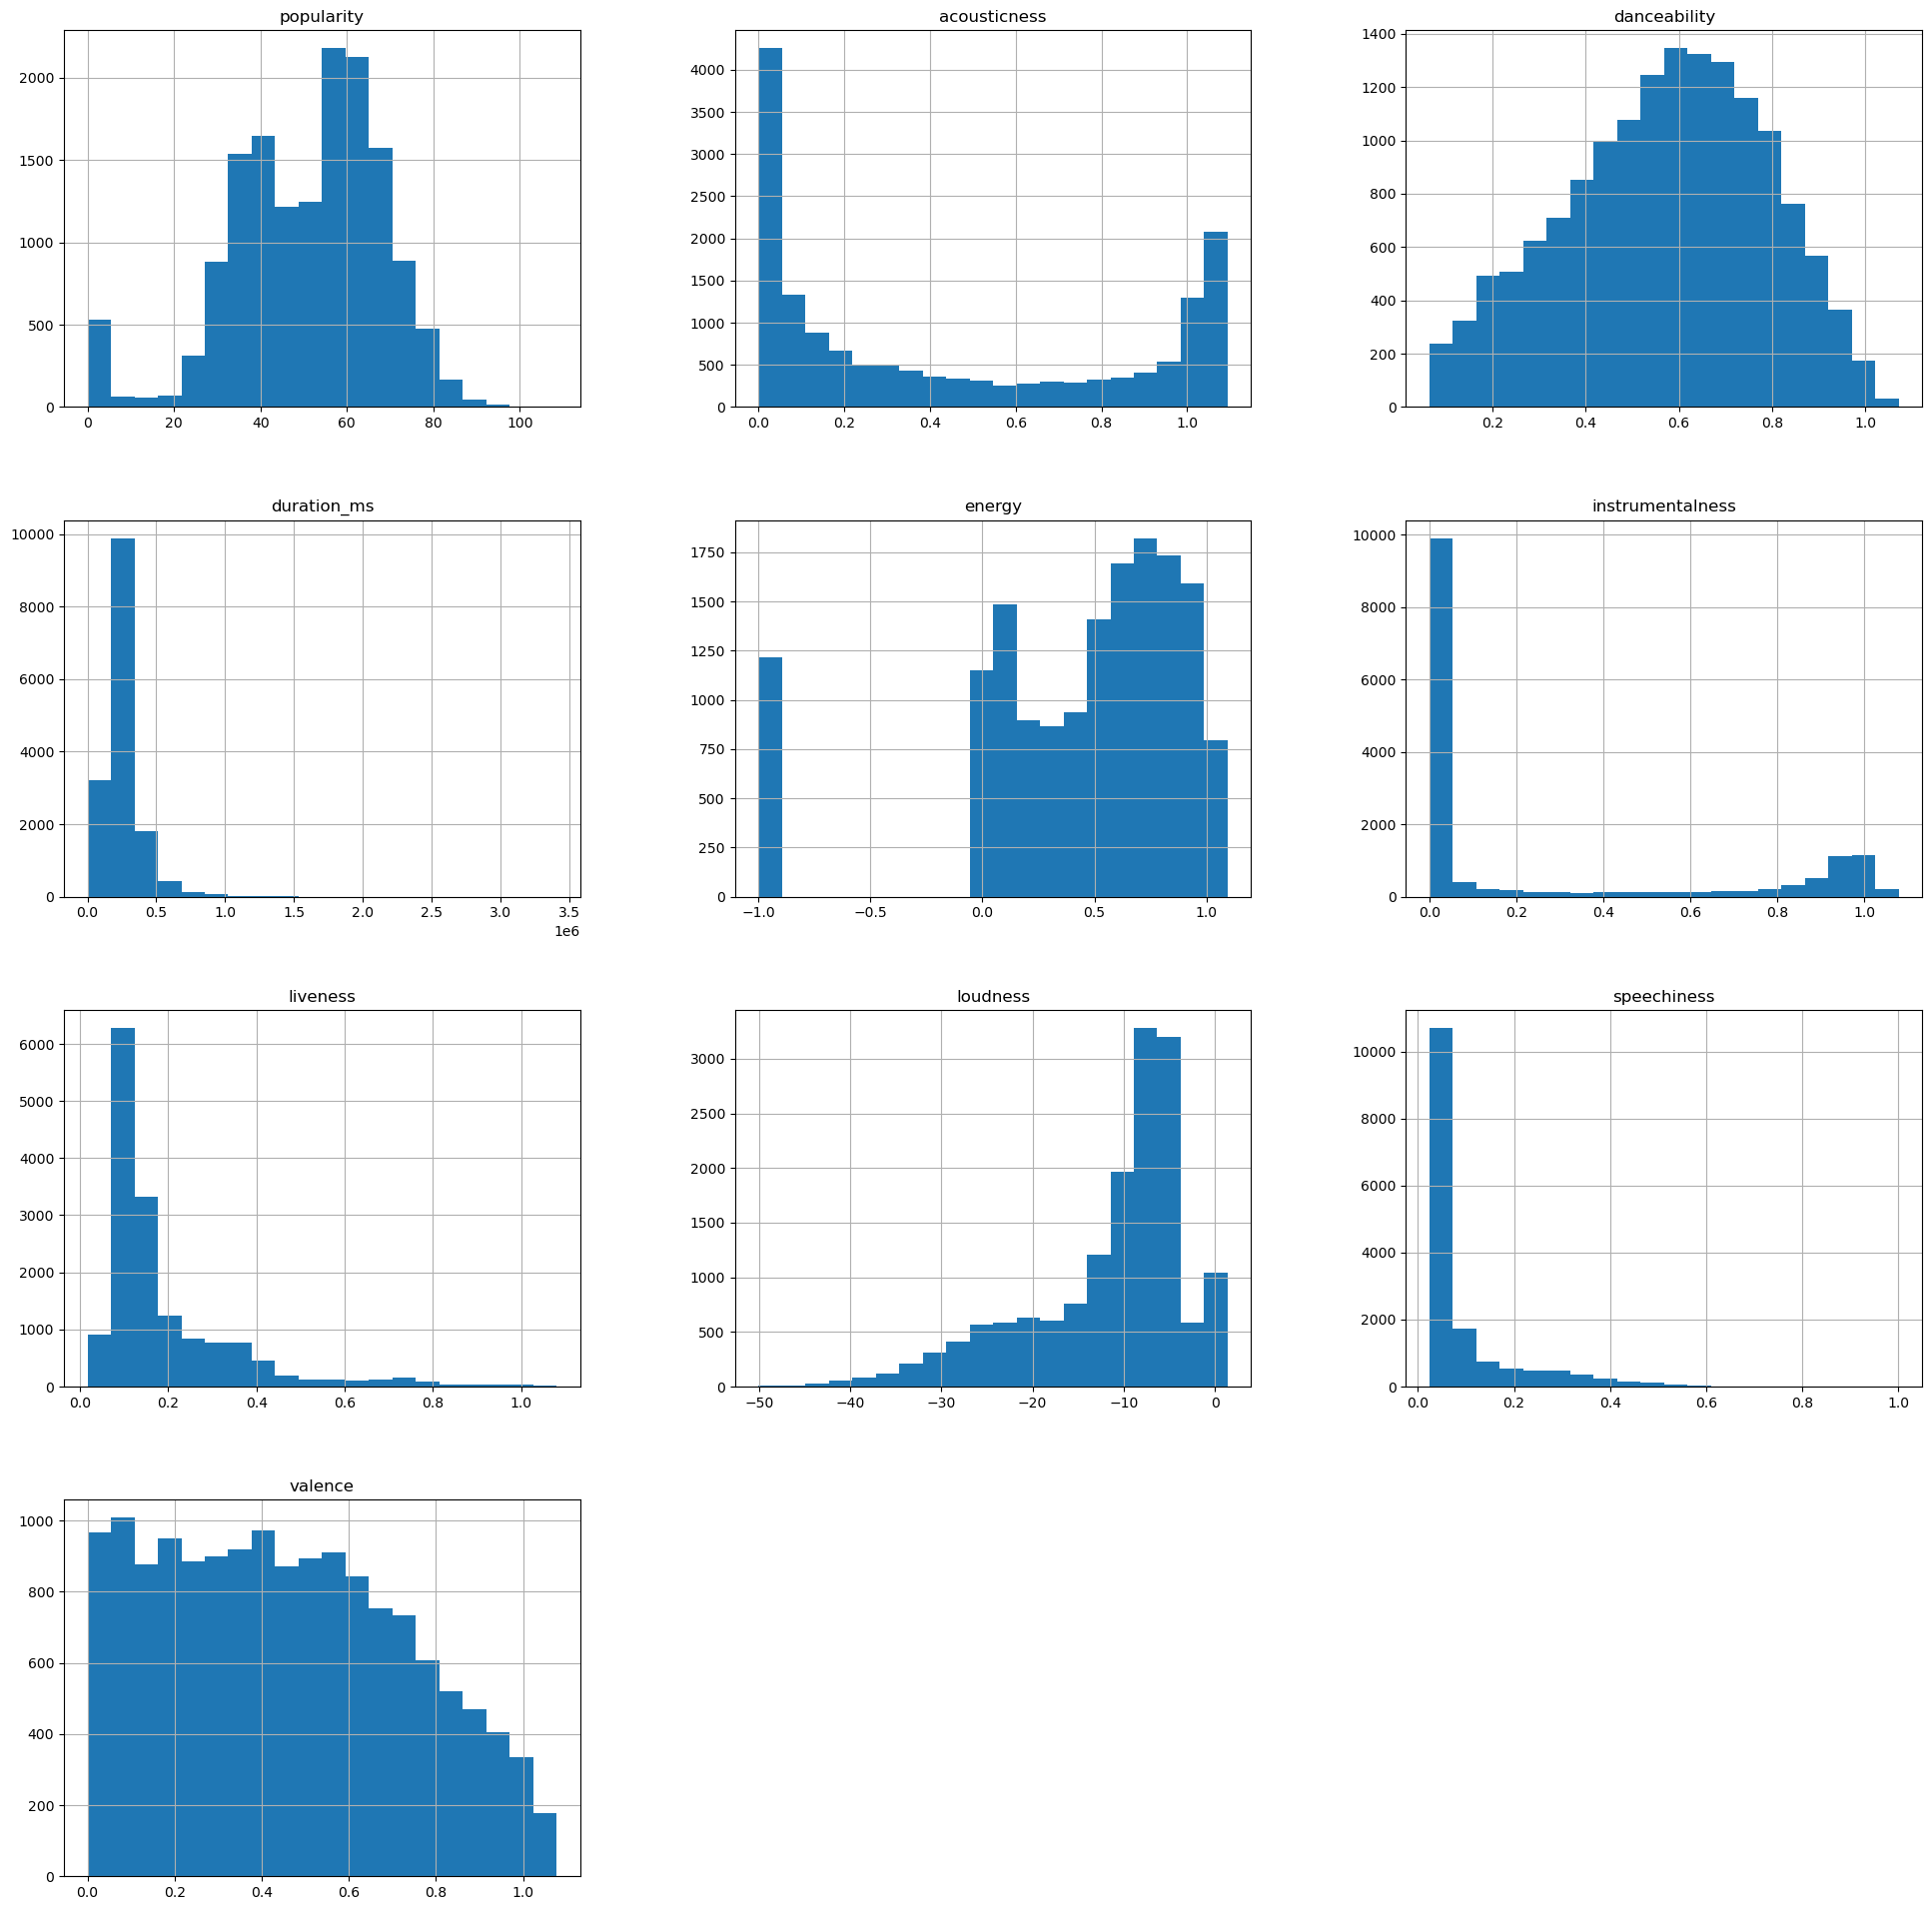

In [65]:
# Histograms to find the distributions and outlier in the each feature
numerical_data.hist(figsize=(24,24),bins=20)
plt.show()

In [66]:
# Number Unique values in each feature
numerical_data.nunique()

popularity          12743
acousticness        15660
danceability        15125
duration_ms         14011
energy              14371
instrumentalness     9950
liveness            15681
loudness            10473
speechiness         15655
valence             15003
dtype: int64

In [67]:
categorical_data.nunique()

instance_id          15681
track_name           14799
key                     12
voice_gender             3
mode                     3
tempo                12332
musician_category        3
music_genre              7
dtype: int64

C:\Users\jinuv\AppData\Local\Temp\ipykernel_5904\3247364276.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), ax=ax, annot=True)


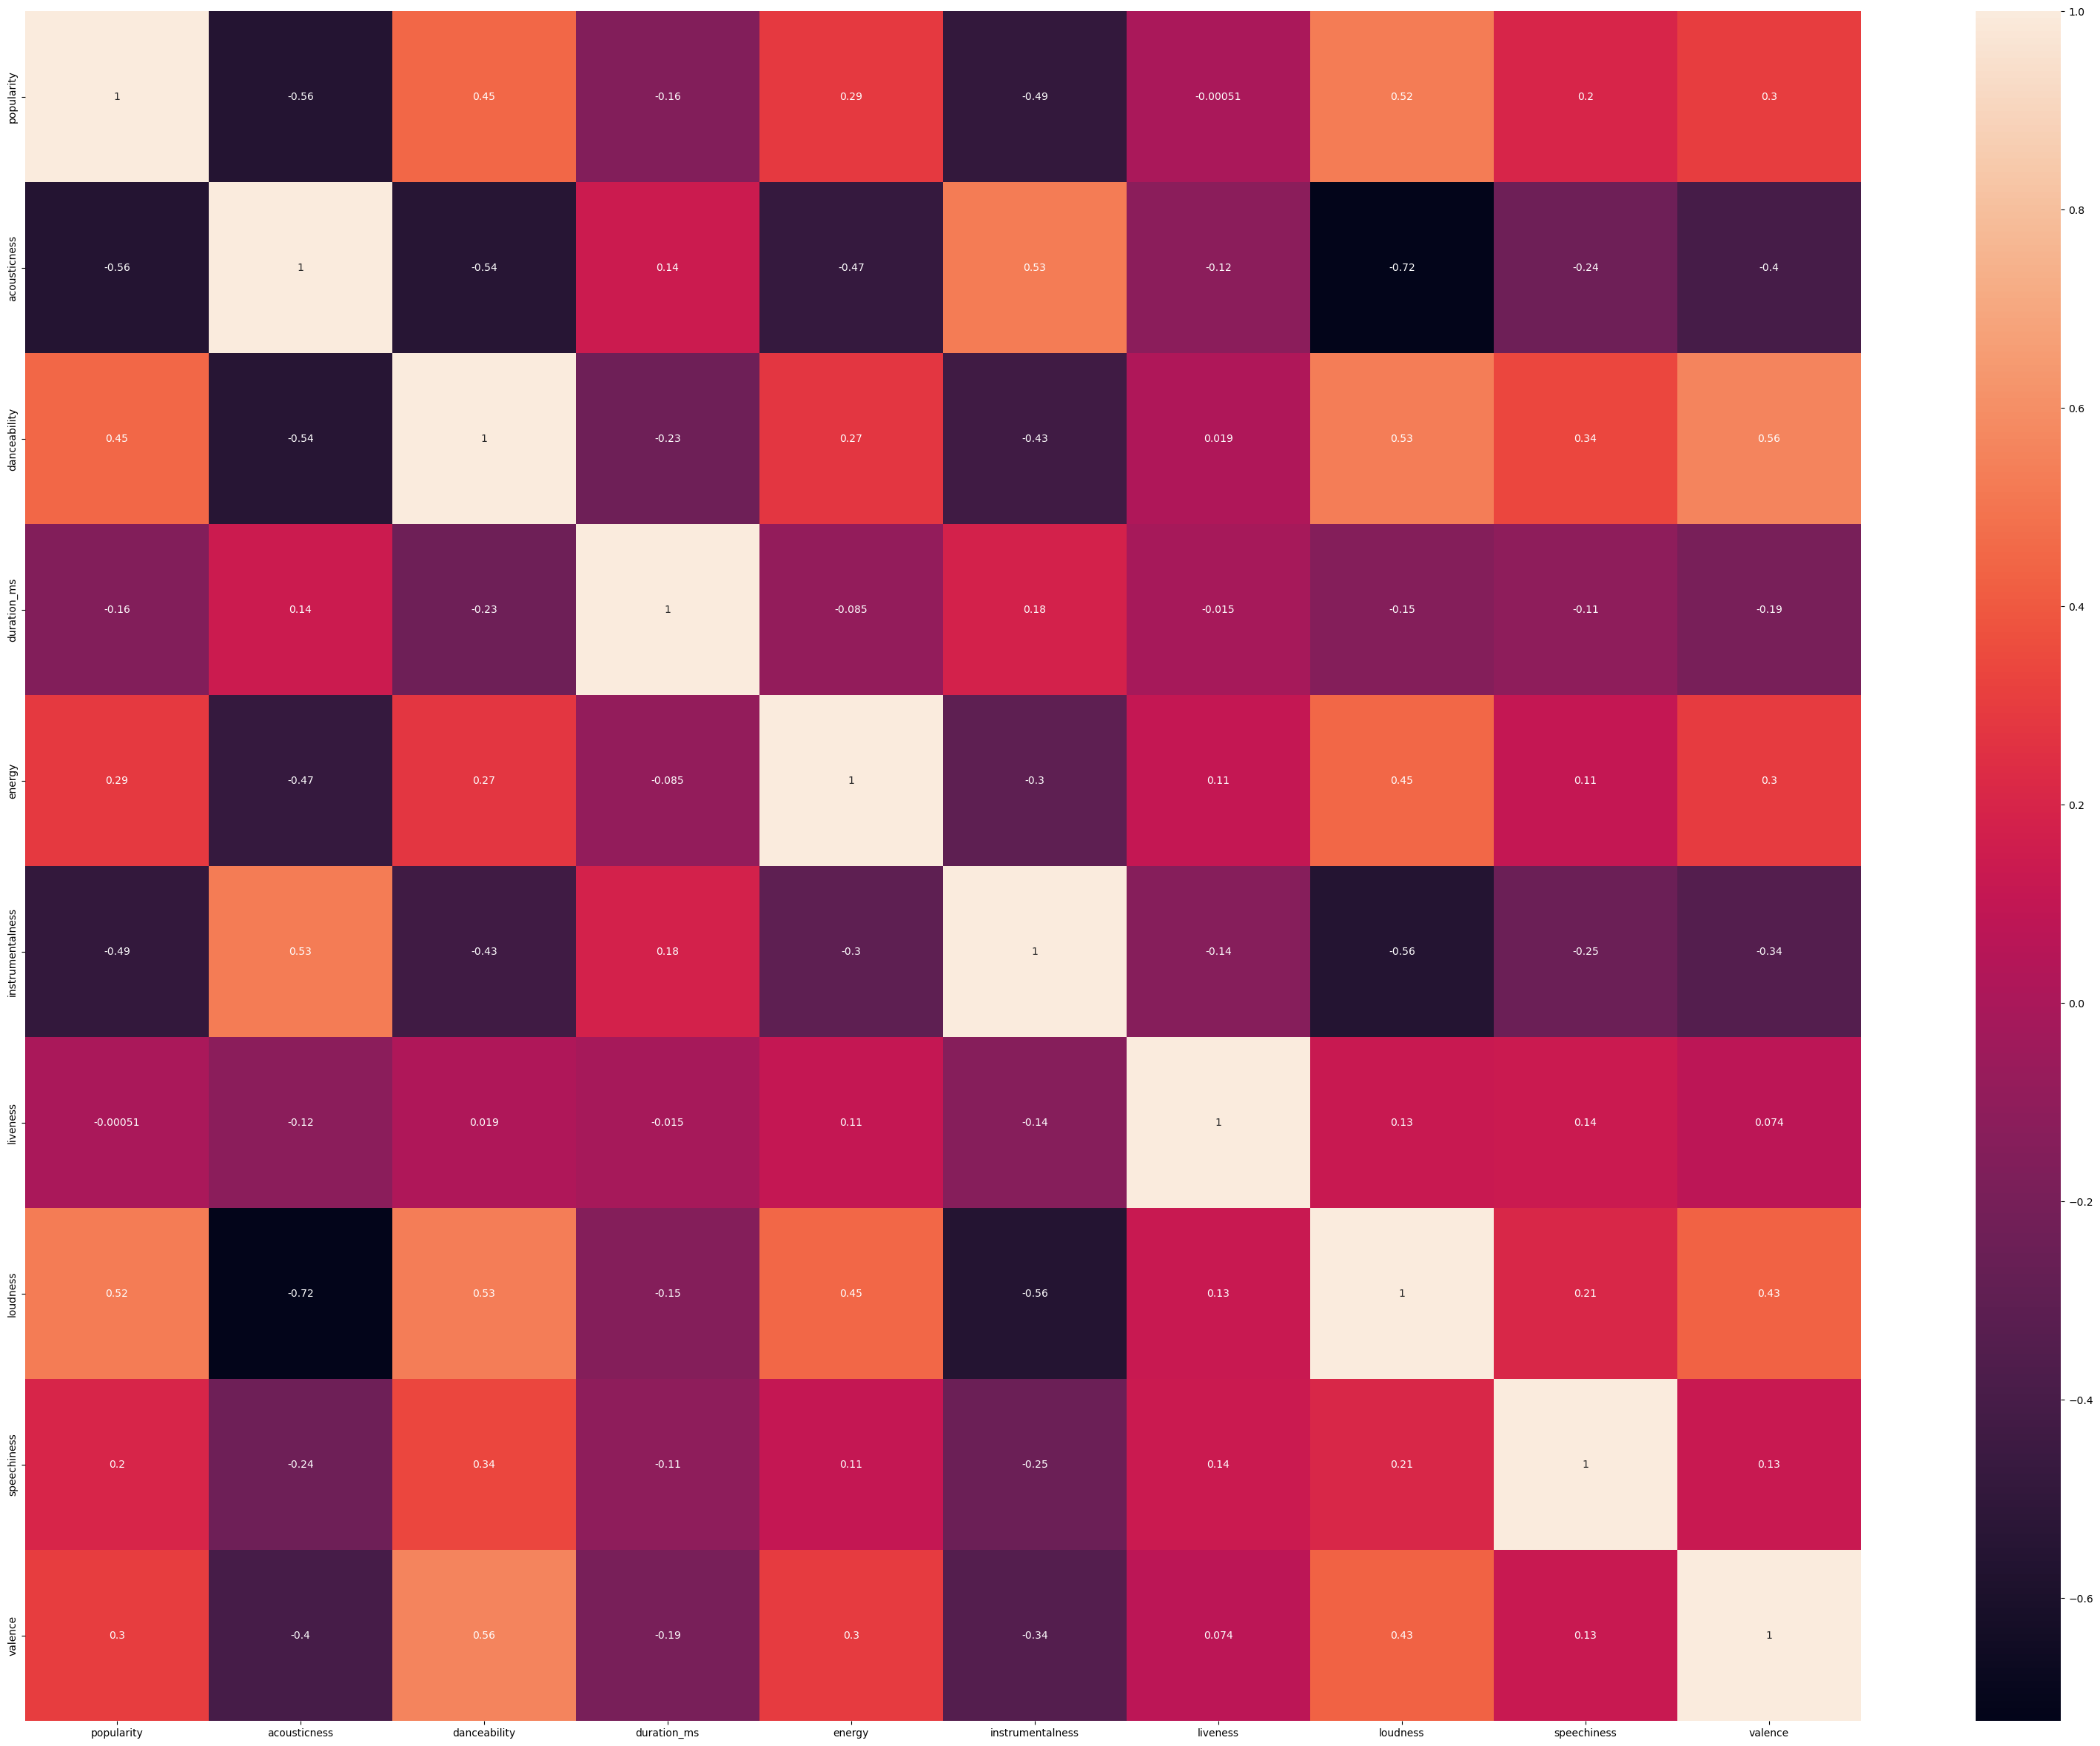

In [68]:
#Correlation Heatmap plot of whole dataset
# Plot correlation matrix in heatmap
fig, ax = plt.subplots(figsize=(40, 30))
sns.heatmap(df.corr(), ax=ax, annot=True)
plt.show()

In [69]:
## To know the missing values
categorical_data.isna().sum()

instance_id             0
track_name              0
key                     0
voice_gender          765
mode                   35
tempo                   0
musician_category    1360
music_genre             0
dtype: int64

In [70]:
## To fill missing values in categorical column
for i in ['voice_gender','mode','musician_category']:
    df[i]=df[i].fillna(df[i].mode()[0])

In [71]:
## To know the missing values
numerical_data.isna().sum()

popularity          642
acousticness          0
danceability        556
duration_ms          94
energy               94
instrumentalness     95
liveness              0
loudness             36
speechiness          26
valence             677
dtype: int64

In [72]:
## To fill missing values in numerical columns
for i in ['popularity','danceability','duration_ms','energy','instrumentalness','loudness','speechiness','valence']:
    df[i]=df[i].fillna(df[i].median())

In [73]:
# missing values
df.isnull().sum()

instance_id          0
track_name           0
popularity           0
acousticness         0
danceability         0
duration_ms          0
energy               0
instrumentalness     0
key                  0
liveness             0
loudness             0
voice_gender         0
mode                 0
speechiness          0
tempo                0
musician_category    0
valence              0
music_genre          0
dtype: int64

In [74]:
# Define a function to detect outliers using Z-score
def find_outliers_zscore(df, threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    return z_scores > threshold

In [75]:
outliers_all_columns = df.drop(columns=['instance_id','voice_gender','mode','musician_category','track_name','key','tempo','music_genre']).apply(find_outliers_zscore)

In [76]:
outliers_rows = outliers_all_columns.any(axis=1)
outliers_detected = df[outliers_rows]

In [77]:
# Get the index of potential outliers
potential_outliers_index = outliers_detected.index

In [78]:
potential_outliers_index

Int64Index([   15,    40,    46,    49,    53,    66,    81,    85,    91,
               92,
            ...
            15602, 15612, 15618, 15627, 15636, 15653, 15654, 15655, 15673,
            15677],
           dtype='int64', length=1207)

In [79]:
# Remove the potential outliers from the original DataFrame
df_cleaned = df.drop(index=potential_outliers_index)

In [80]:
# After removing outliers and storing the cleaned DataFrame in 'df_cleaned'
# Reset the index of the DataFrame
df_cleaned.reset_index(drop=True, inplace=True)

## Label Encoding

In [81]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cleaned['key'] = le.fit_transform(df_cleaned['key'])
df_cleaned['voice_gender'] = le.fit_transform(df_cleaned['voice_gender'])
df_cleaned['mode'] = le.fit_transform(df_cleaned['mode'])
df_cleaned['tempo'] = le.fit_transform(df_cleaned['tempo'])
df_cleaned['musician_category'] = le.fit_transform(df_cleaned['musician_category'])
df_cleaned['music_genre'] = le.fit_transform(df_cleaned['music_genre'])

In [83]:
df_cleaned

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,7,0.147134,-14.140,1,1,0.046404,4955,0,0.598965,4
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000030,0,0.174655,-13.716,2,0,0.039949,11415,0,0.357194,4
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,5,0.042030,-4.995,1,1,0.119917,582,0,0.635525,5
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,5,0.124637,-4.262,0,1,0.167493,11415,1,0.983750,6
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,9,0.134782,-26.922,1,2,0.039139,1374,0,0.074412,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14469,MSC_61517.0,"Mother Of God, Here I Stand",28.318,1.054190,0.136130,188388.500,0.042151,1.024128,10,0.135912,-29.236,1,1,0.057739,7765,2,0.040686,0
14470,MSC_73047.0,I. Andante,0.000,0.866988,0.387476,-1.000,0.196799,0.028725,2,0.248399,-16.331,1,1,0.045251,2653,0,0.624518,0
14471,MSC_32827.0,Moment's Notice,35.082,0.905281,0.566619,581799.061,0.543673,0.209238,6,0.416611,-10.246,1,1,0.040625,2630,0,0.869294,4
14472,MSC_89976.0,Such Small Scenes,59.693,0.113408,0.644554,151226.592,0.912201,0.000089,8,0.166336,-7.257,0,2,0.060308,1795,1,0.402700,6


In [84]:
df_cleaned.drop(["instance_id","track_name"],axis=1,inplace=True)

In [85]:
df_cleaned

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,7,0.147134,-14.140,1,1,0.046404,4955,0,0.598965,4
1,59.827,1.009380,0.687542,216232.195,0.265942,0.000030,0,0.174655,-13.716,2,0,0.039949,11415,0,0.357194,4
2,89.023,0.020041,0.967948,273314.723,0.857411,0.000000,5,0.042030,-4.995,1,1,0.119917,582,0,0.635525,5
3,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,5,0.124637,-4.262,0,1,0.167493,11415,1,0.983750,6
4,45.095,0.858769,0.280645,410136.987,0.114732,0.002753,9,0.134782,-26.922,1,2,0.039139,1374,0,0.074412,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14469,28.318,1.054190,0.136130,188388.500,0.042151,1.024128,10,0.135912,-29.236,1,1,0.057739,7765,2,0.040686,0
14470,0.000,0.866988,0.387476,-1.000,0.196799,0.028725,2,0.248399,-16.331,1,1,0.045251,2653,0,0.624518,0
14471,35.082,0.905281,0.566619,581799.061,0.543673,0.209238,6,0.416611,-10.246,1,1,0.040625,2630,0,0.869294,4
14472,59.693,0.113408,0.644554,151226.592,0.912201,0.000089,8,0.166336,-7.257,0,2,0.060308,1795,1,0.402700,6


In [87]:
## To spilt into two variables
x=df_cleaned.drop(['music_genre'],axis=1)
y=df_cleaned['music_genre']

In [88]:
## To do minmax scaler
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)

In [89]:
x

array([[0.48435007, 0.88679908, 0.51568183, ..., 0.43407797, 0.        ,
        0.55615685],
       [0.58923119, 0.92230469, 0.62253676, ..., 1.        , 0.        ,
        0.33166502],
       [0.87678019, 0.01831102, 0.90247448, ..., 0.05098555, 0.        ,
        0.59010436],
       ...,
       [0.34551973, 0.82718556, 0.5018159 , ..., 0.2303986 , 0.        ,
        0.80716601],
       [0.58791144, 0.1036232 , 0.57962066, ..., 0.15724923, 0.5       ,
        0.37391895],
       [0.55664113, 0.77405676, 0.43746518, ..., 0.9303548 , 1.        ,
        0.3331356 ]])

In [90]:
## To change array to Dataframe
x=pd.DataFrame(x)

In [91]:
## To split data in training and test sets and to apply logistic regression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LogisticRegression
Ir=LogisticRegression()
model=Ir.fit(x_train,y_train)
y_pred=model.predict(x_test)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [92]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Logistic Regression:
Accuracy: 0.7326424870466322
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       715
           1       0.59      0.18      0.28       130
           2       0.53      0.31      0.39       110
           3       0.00      0.00      0.00        77
           4       0.67      0.66      0.67       552
           5       0.72      0.76      0.74       558
           6       0.70      0.86      0.77       753

    accuracy                           0.73      2895
   macro avg       0.58      0.52      0.53      2895
weighted avg       0.71      0.73      0.71      2895



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
from sklearn.tree import DecisionTreeClassifier
# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [94]:
# Make predictions on the test set
dt_y_pred = dt_model.predict(x_test)

In [95]:
# Evaluate the model
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, dt_y_pred))
print(classification_report(y_test, dt_y_pred))

Decision Tree:
Accuracy: 0.6597582037996546
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       715
           1       0.37      0.39      0.38       130
           2       0.34      0.33      0.33       110
           3       0.11      0.12      0.12        77
           4       0.61      0.59      0.60       552
           5       0.62      0.66      0.64       558
           6       0.70      0.68      0.69       753

    accuracy                           0.66      2895
   macro avg       0.52      0.52      0.52      2895
weighted avg       0.66      0.66      0.66      2895



In [96]:
from sklearn.ensemble import RandomForestClassifier
# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [97]:
# Make predictions on the test set
rf_y_pred = rf_model.predict(x_test)

In [98]:
# Evaluate the model
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

Random Forest:
Accuracy: 0.7758203799654577
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       715
           1       0.70      0.42      0.53       130
           2       0.72      0.35      0.48       110
           3       0.00      0.00      0.00        77
           4       0.74      0.74      0.74       552
           5       0.75      0.79      0.77       558
           6       0.73      0.86      0.79       753

    accuracy                           0.78      2895
   macro avg       0.65      0.58      0.60      2895
weighted avg       0.76      0.78      0.76      2895



In [99]:
from sklearn.neighbors import KNeighborsClassifier
# create an empty list.
metric_k=[]
neighbors=np.arange(3,15)

In [100]:
# Train the KNN model
for k in neighbors:
  knn_model=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  knn_model.fit(x_train,y_train)
  # Make predictions on the test set
  knn_y_pred=knn_model.predict(x_test)
  acc=accuracy_score(y_test,knn_y_pred)
  metric_k.append(acc)

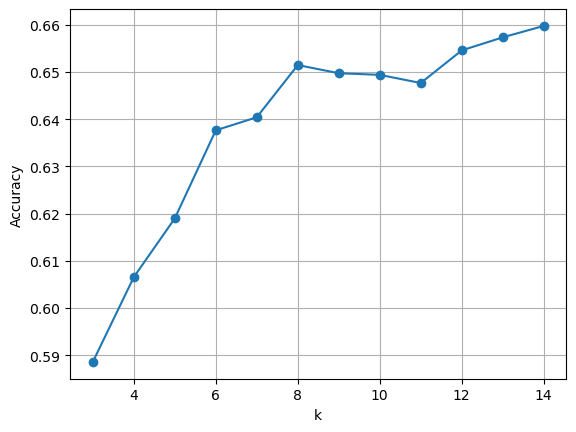

In [101]:
# Lets plot a graph to find highest accuracy score of given k
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()

In [102]:
# Lets create knn model for 6 neighbors
knn_model=KNeighborsClassifier(n_neighbors=6,metric='euclidean')
knn_model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [103]:
# Make predictions on the test set
knn_y_pred=knn_model.predict(x_test)

In [104]:
# Evaluate the model
print("KNN Model:")
print("Accuracy:", accuracy_score(y_test, knn_y_pred))
print(classification_report(y_test, knn_y_pred))

KNN Model:
Accuracy: 0.6376511226252158
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       715
           1       0.24      0.23      0.23       130
           2       0.42      0.16      0.24       110
           3       0.07      0.03      0.04        77
           4       0.62      0.51      0.56       552
           5       0.59      0.67      0.63       558
           6       0.59      0.69      0.64       753

    accuracy                           0.64      2895
   macro avg       0.48      0.45      0.46      2895
weighted avg       0.62      0.64      0.63      2895



In [105]:
from sklearn.model_selection import RandomizedSearchCV

In [106]:
param_dist = {
    'n_neighbors': range(3, 15),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [107]:
# perform randomized search cv
random_search = RandomizedSearchCV(
    knn_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings to sample
    cv=2,       # Cross-validation folds
    random_state=42
)

random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=2,
                   estimator=KNeighborsClassifier(metric='euclidean',
                                                  n_neighbors=6),
                   param_distributions={'n_neighbors': range(3, 15),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42)

In [108]:
# Print best parameters
print("Best parameters:", random_search.best_params_)

Best parameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 13}


In [109]:
# Make predictions
best_knn = random_search.best_estimator_

predictions = best_knn.predict(x_test)

In [110]:
# Evaluate the model
print("Randomsearch Model:")
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Randomsearch Model:
Accuracy: 0.6573402417962003
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       715
           1       0.24      0.06      0.10       130
           2       0.38      0.09      0.15       110
           3       0.00      0.00      0.00        77
           4       0.63      0.52      0.57       552
           5       0.62      0.69      0.65       558
           6       0.57      0.80      0.67       753

    accuracy                           0.66      2895
   macro avg       0.47      0.43      0.43      2895
weighted avg       0.63      0.66      0.63      2895



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
